## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [82]:
# Import the required libraries and dependencies including 
# pandas, pathlib and %mathplotlib inline
import pandas as pd
from pathlib import Path
%matplotlib inline


## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [83]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    #Path('./Resources/bitstamp.csv')
    Path('./Resources/bitstamp.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)
bitstamp.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1588619 entries, 2015-12-31 19:01:00 to 2019-01-07 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Open            1350419 non-null  float64
 1   High            1350419 non-null  float64
 2   Low             1350419 non-null  float64
 3   Close           1588619 non-null  object 
 4   BTC Volume      1350419 non-null  float64
 5   USD Volume      1350419 non-null  float64
 6   Weighted Price  1350419 non-null  float64
dtypes: float64(6), object(1)
memory usage: 97.0+ MB


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [84]:
# Read the first 5 rows of the 'bitstamp' DataFrame.
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1588619 entries, 2015-12-31 19:01:00 to 2019-01-07 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Open            1350419 non-null  float64
 1   High            1350419 non-null  float64
 2   Low             1350419 non-null  float64
 3   Close           1588619 non-null  object 
 4   BTC Volume      1350419 non-null  float64
 5   USD Volume      1350419 non-null  float64
 6   Weighted Price  1350419 non-null  float64
dtypes: float64(6), object(1)
memory usage: 97.0+ MB


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [85]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)
coinbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1588206 entries, 2015-12-31 19:01:00 to 2019-01-07 17:06:00
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Open            1550147 non-null  float64
 1   High            1550147 non-null  float64
 2   Low             1550147 non-null  float64
 3   Close           1588206 non-null  object 
 4   BTC Volume      1550147 non-null  float64
 5   USD Volume      1550147 non-null  float64
 6   Weighted Price  1550147 non-null  float64
dtypes: float64(6), object(1)
memory usage: 96.9+ MB


In [86]:
# Review the firs 5 rows of the 'coinbase' DataFrame.
coinbase.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [87]:
# Cleaning nulls from DataFrame by dropping.
bitstamp = bitstamp.dropna().copy()
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,$432.52,4.117318,1776.650476,431.506725


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [88]:
# Removing $ symbol in Close data.
bitstamp["Close"] = bitstamp["Close"].str.replace("$","")
bitstamp["Close"]


Timestamp
2015-12-31 19:01:00     430.89
2015-12-31 19:02:00     430.89
2015-12-31 19:04:00     431.06
2015-12-31 19:05:00     430.54
2015-12-31 19:06:00     432.52
                        ...   
2019-01-07 23:54:00    3980.33
2019-01-07 23:55:00    3977.81
2019-01-07 23:57:00     3984.4
2019-01-07 23:58:00    3980.97
2019-01-07 23:59:00    3983.52
Name: Close, Length: 1350419, dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [89]:
# Convert Close column to a float.
bitstamp["Close"] = bitstamp["Close"].astype("float")


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [90]:
# Check for duplicates.
bitstamp = bitstamp.drop_duplicates().copy()
bitstamp.duplicated().mean()
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1347772 entries, 2015-12-31 19:01:00 to 2019-01-07 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Open            1347772 non-null  float64
 1   High            1347772 non-null  float64
 2   Low             1347772 non-null  float64
 3   Close           1347772 non-null  float64
 4   BTC Volume      1347772 non-null  float64
 5   USD Volume      1347772 non-null  float64
 6   Weighted Price  1347772 non-null  float64
dtypes: float64(7)
memory usage: 82.3 MB


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [91]:
# Repeat Steps 1–4 for the coinbase DataFrame
# Cleaning nulls from DataFrame by dropping.
coinbase = coinbase.dropna().copy()
coinbase.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001


In [92]:
# Removing $ symbol in Close data.
coinbase["Close"] = coinbase["Close"].str.replace("$","")
coinbase["Close"]

Timestamp
2015-12-31 19:01:00      430.4
2015-12-31 19:02:00      430.4
2015-12-31 19:03:00     430.36
2015-12-31 19:04:00     430.39
2015-12-31 19:05:00     430.96
                        ...   
2019-01-07 17:02:00    4006.01
2019-01-07 17:03:00    4006.01
2019-01-07 17:04:00    4006.01
2019-01-07 17:05:00     4005.5
2019-01-07 17:06:00    4005.99
Name: Close, Length: 1550147, dtype: object

In [93]:
# Convert Close column to a float.
coinbase["Close"] = coinbase["Close"].astype("float")

In [94]:
# Check for duplicates.
#coinbase["USD Volume"].duplicated()
coinbase = coinbase.drop_duplicates().copy()
coinbase.duplicated().mean()
coinbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1549523 entries, 2015-12-31 19:01:00 to 2019-01-07 17:06:00
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Open            1549523 non-null  float64
 1   High            1549523 non-null  float64
 2   Low             1549523 non-null  float64
 3   Close           1549523 non-null  float64
 4   BTC Volume      1549523 non-null  float64
 5   USD Volume      1549523 non-null  float64
 6   Weighted Price  1549523 non-null  float64
dtypes: float64(7)
memory usage: 94.6 MB


## Analyze the Data

Your analysis consists of the following steps:

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [95]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp ['Close'].loc['2015-02-01':'2019-01-31']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()




Timestamp
2015-12-31 19:01:00    430.89
2015-12-31 19:02:00    430.89
2015-12-31 19:04:00    431.06
2015-12-31 19:05:00    430.54
2015-12-31 19:06:00    432.52
Name: Close, dtype: float64

Timestamp
2015-12-31 19:01:00    430.40
2015-12-31 19:02:00    430.40
2015-12-31 19:03:00    430.36
2015-12-31 19:04:00    430.39
2015-12-31 19:05:00    430.96
Name: Close, dtype: float64

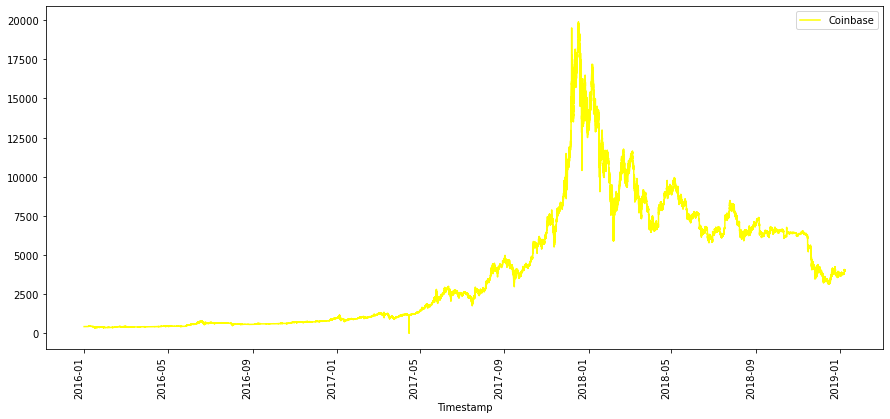

In [96]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase ['Close'].loc['2015-02-01':'2019-01-31']
coinbase_sliced.plot(legend=True, figsize=(15,7), rot=90, color="yellow", label="Coinbase")

# Displaying the first five rows of the DataFrame
coinbase_sliced.head()


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [97]:
# Generate the summary statistics for the bitstamp DataFrame

bitstamp_sliced.describe()


count    1.347772e+06
mean     4.503924e+03
std      3.956149e+03
min      1.500000e+00
25%      7.888900e+02
50%      3.788990e+03
75%      6.929443e+03
max      1.966575e+04
Name: Close, dtype: float64

In [98]:
# Generate the summary statistics for the coinbase DataFrame

coinbase_sliced.describe()

count    1.549523e+06
mean     4.091926e+03
std      3.913501e+03
min      6.000000e-02
25%      6.754000e+02
50%      2.710730e+03
75%      6.593500e+03
max      1.989199e+04
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp', ylabel='Close Price'>

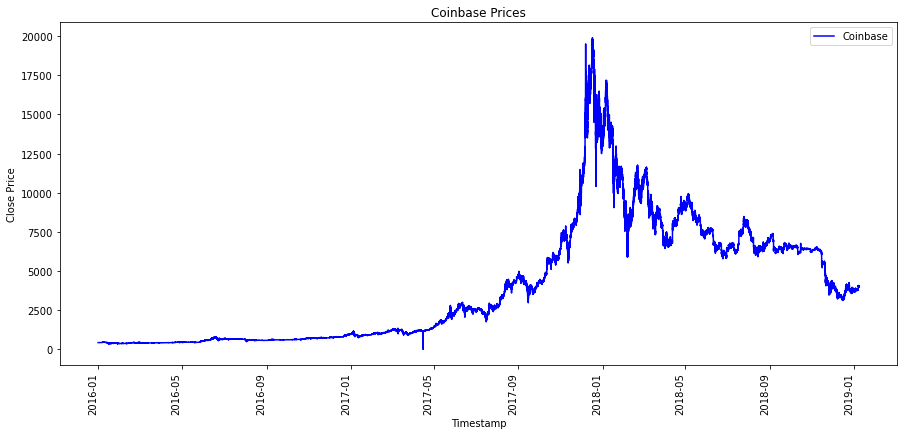

In [99]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

coinbase_sliced.plot(legend=True, figsize=(15,7), rot=90, color="blue", label='Coinbase', ylabel='Close Price', title="Coinbase Prices")


<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp', ylabel='Close Price'>

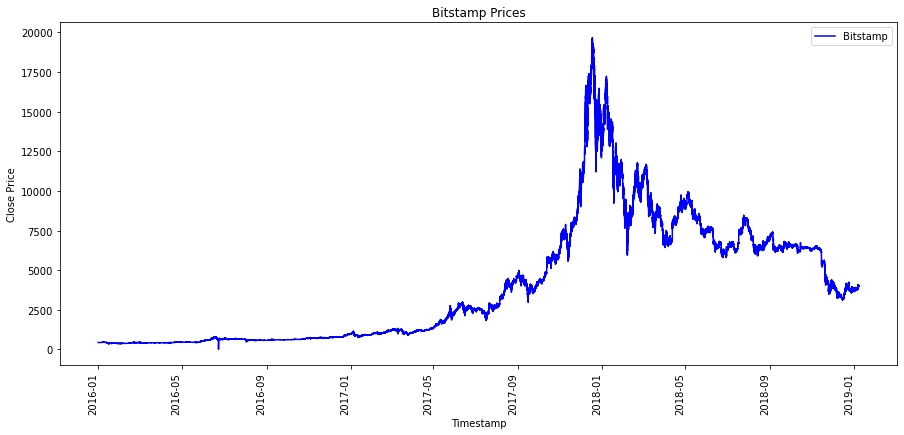

In [100]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

bitstamp_sliced.plot(legend=True, figsize=(15,7), rot=90, color="blue", label='Bitstamp', ylabel='Close Price', title="Bitstamp Prices")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

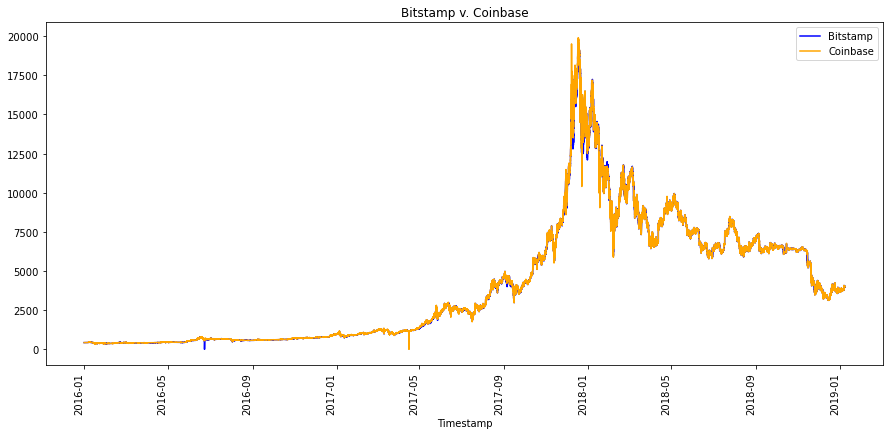

In [101]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp_sliced.plot(legend=True, figsize=(15,7), rot=90, color="blue", label='Bitstamp', title="Bitstamp v. Coinbase")
coinbase_sliced.plot(legend=True, figsize=(15,7), rot=90, color="orange", label='Coinbase')


<AxesSubplot:title={'center':'Exchange Comparision (Earlier Time Period)'}, xlabel='Timestamp'>

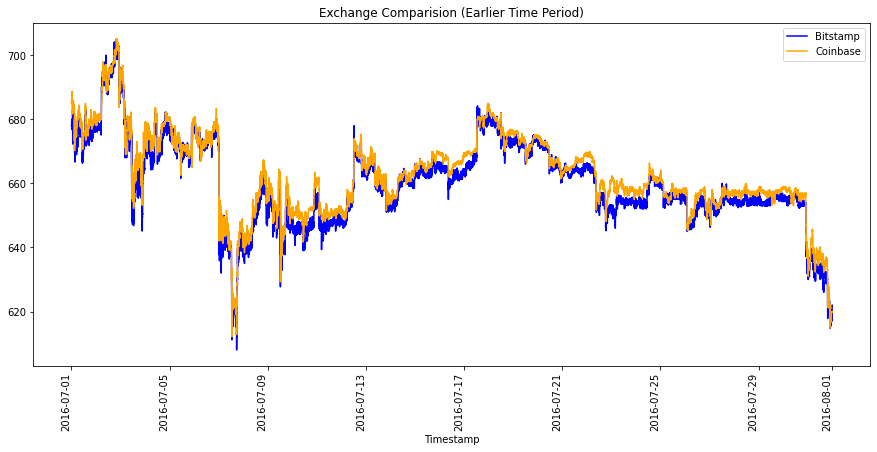

In [102]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp_slicedx = bitstamp ['Close'].loc['2016-07-01':'2016-07-31']
bitstamp_slicedx.plot(legend=True, figsize=(15,7), rot=90, color="blue", label="Bitstamp",title="Exchange Comparision (Earlier Time Period)")
coinbase_slicedx = coinbase ['Close'].loc['2016-07-01':'2016-07-31']
coinbase_slicedx.plot(legend=True, figsize=(15,7), rot=90, color="orange", label="Coinbase")


<AxesSubplot:title={'center':'Exchange Comparision (Earlier Time Period)'}, xlabel='Timestamp'>

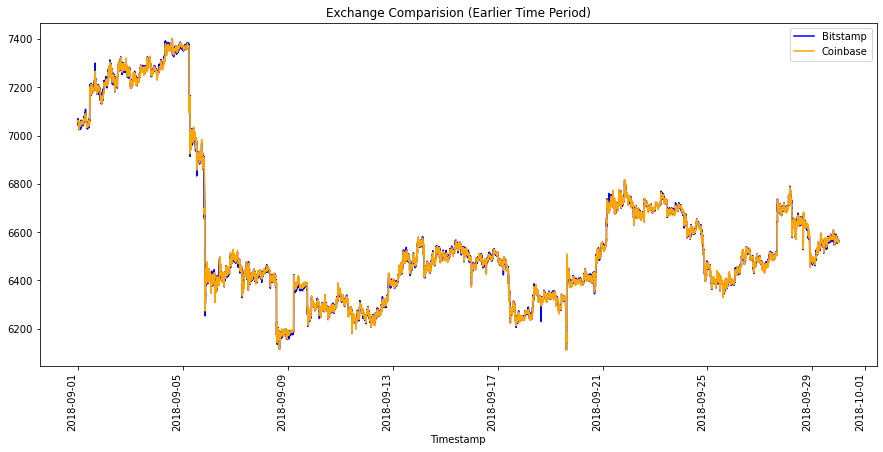

In [103]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 

bitstamp_slicedx = bitstamp ['Close'].loc['2018-09-01':'2018-09-29']
bitstamp_slicedx.plot(legend=True, figsize=(15,7), rot=90, color="blue", label="Bitstamp",title="Exchange Comparision (Earlier Time Period)")
coinbase_slicedx = coinbase ['Close'].loc['2018-09-01':'2018-09-29']
coinbase_slicedx.plot(legend=True, figsize=(15,7), rot=90, color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** # yes, based on the graphs comparisons the spread has narrow. 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the last year of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'July 22, 2016'}, xlabel='Timestamp'>

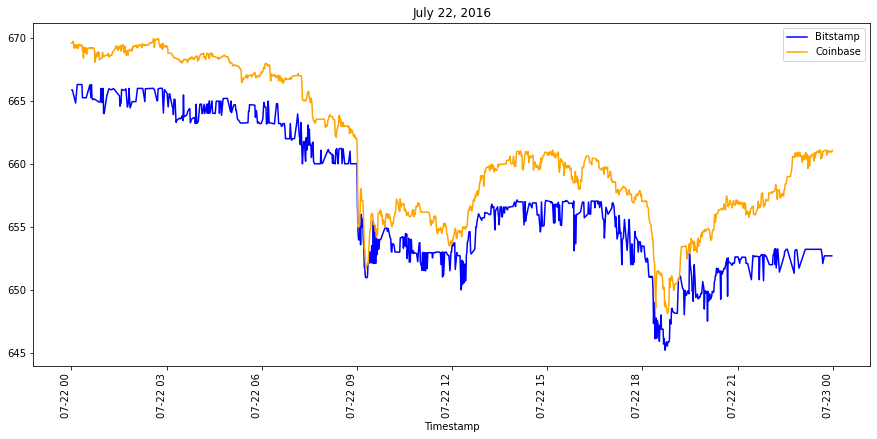

In [104]:
# Using the loc function, create an overlay plot that visualizes the two dataframes
# over a period of one day in from early in dataset.
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label`
bitstamp_sliced_early = bitstamp ['Close'].loc['2016-07-22']
bitstamp_sliced_early.plot(legend=True, figsize=(15,7), rot=90, color="blue", label="Bitstamp",title="July 22, 2016")
coinbase_sliced_early = coinbase ['Close'].loc['2016-07-22']
coinbase_sliced_early.plot(legend=True, figsize=(15,7), rot=90, color="orange", label="Coinbase")

In [105]:
# Calculating the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase ['Close'].loc['2016-07-22'] - bitstamp ['Close'].loc['2016-07-22']

# Use the describe function to generate the summary statistics for the `arbitrage_spread_early` DataFrame
arbitrage_spread_early.describe()


count    806.000000
mean       3.572146
std        1.332831
min       -0.290000
25%        2.825000
50%        3.550000
75%        4.397500
max        9.210000
Name: Close, dtype: float64

<AxesSubplot:>

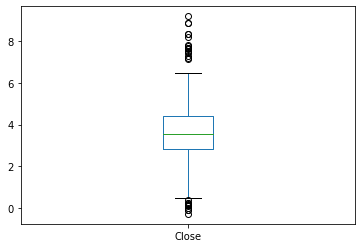

In [106]:
# Visualizing the arbitrage spread from the lower of the dataset in a box plot
arbitrage_spread_early.plot(kind='box')


<AxesSubplot:title={'center':'September 15, 2017'}, xlabel='Timestamp'>

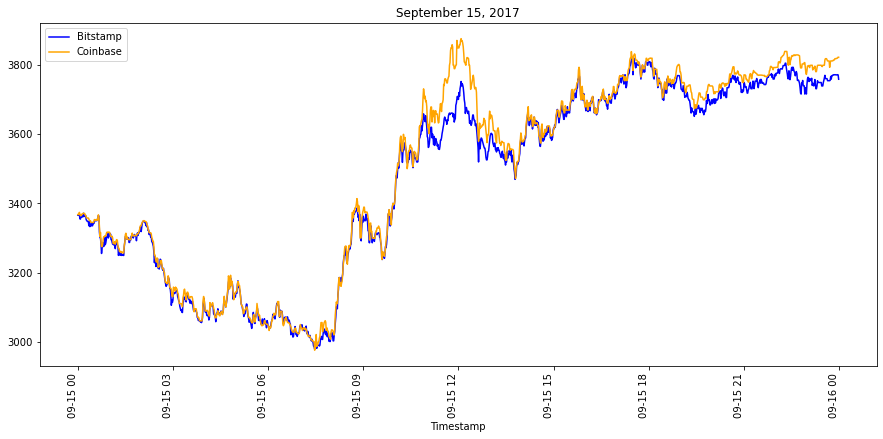

In [107]:
# Using the loc function, create an overlay plot that visualizes the two dataframes
# over a period of one day in from middle in dataset.
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label`

bitstamp_sliced_middle = bitstamp ['Close'].loc['2017-09-15']
bitstamp_sliced_middle.plot(legend=True, figsize=(15,7), rot=90, color="blue", label="Bitstamp",title="September 15, 2017")
coinbase_sliced_middle = coinbase ['Close'].loc['2017-09-15']
coinbase_sliced_middle.plot(legend=True, figsize=(15,7), rot=90, color="orange", label="Coinbase")


In [108]:
# Calculating the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced_middle - bitstamp_sliced_middle 

# Use the describe function to generate the summary statistics for the `arbitrage_spread_middle` DataFrame
arbitrage_spread_middle.describe()


count    1439.000000
mean       21.959340
std        31.105196
min       -47.930000
25%         3.215000
50%        12.270000
75%        29.835000
max       198.160000
Name: Close, dtype: float64

<AxesSubplot:>

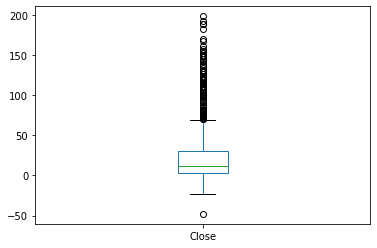

In [109]:
# Visualizing the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'July 15, 2018'}, xlabel='Timestamp'>

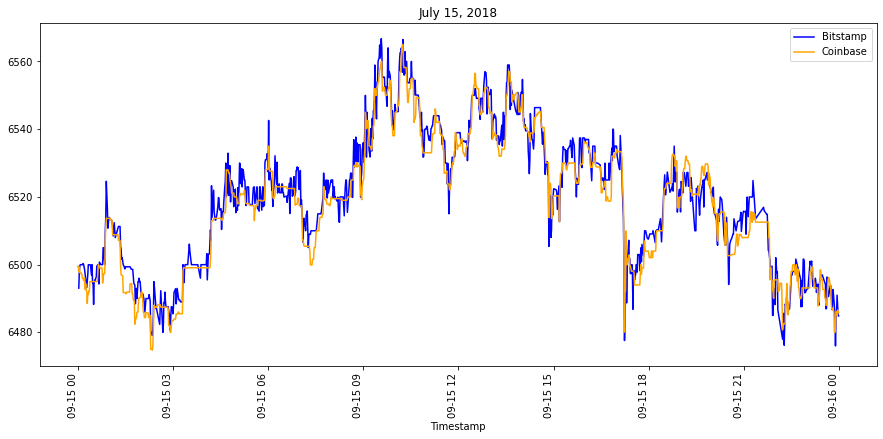

In [110]:
# Using the loc function, create an overlay plot that visualizes the two dataframes
# over a period of one day in from late in dataset.
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label`
bitstamp_sliced_late = bitstamp ['Close'].loc['2018-09-15']
bitstamp_sliced_late.plot(legend=True, figsize=(15,7), rot=90, color="blue", label="Bitstamp",title="July 15, 2018")
coinbase_sliced_late = coinbase ['Close'].loc['2018-09-15']
coinbase_sliced_late.plot(legend=True, figsize=(15,7), rot=90, color="orange", label="Coinbase")


In [111]:
# Calculating the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced_late - bitstamp_sliced_late

# Use the describe function to generate the summary statistics for the `arbitrage_spread_late` DataFrame
arbitrage_spread_late.describe()


count    1065.000000
mean       -1.891587
std         4.177777
min       -13.010000
25%        -4.840000
50%        -2.040000
75%         0.700000
max        13.980000
Name: Close, dtype: float64

<AxesSubplot:>

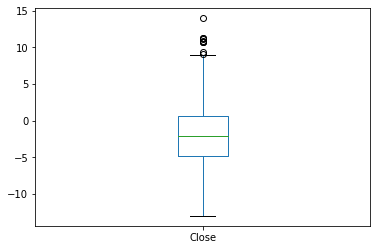

In [112]:
# Visualizing the arbitrage spread from the late of the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

In [113]:
# Measuring the arbitrage spread between the two exchanges form the early dataset
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early  = (coinbase ['Close'].loc['2016-07-22'] - bitstamp ['Close'].loc['2016-07-22']) 

# Filtering the spread return using a conditional statement > zero
arbitrage_spread_early = arbitrage_spread_early[arbitrage_spread_early > 0.0]

# Use the describe function to generate the summary statistics for the `arbitrage spread` DataFrame
arbitrage_spread_early.describe()


count    803.000000
mean       3.586065
std        1.315651
min        0.010000
25%        2.845000
50%        3.560000
75%        4.400000
max        9.210000
Name: Close, dtype: float64

In [114]:
# Measuring the arbitrage spread between the two exchanges form the middle dataset
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle  = (coinbase ['Close'].loc['2017-09-15'] - bitstamp ['Close'].loc['2017-09-15']) 

# Filtering the spread return using a conditional statement > zero
arbitrage_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0.0]

# Use the describe function to generate the summary statistics for the `arbitrage spread` DataFrame
arbitrage_spread_middle.describe()


count    1232.000000
mean       26.439943
std        31.402902
min         0.010000
25%         7.000000
50%        15.250000
75%        33.905000
max       198.160000
Name: Close, dtype: float64

In [115]:
# Measuring the arbitrage spread between the two exchanges form the late dataset
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late  = (coinbase ['Close'].loc['2018-09-15'] - bitstamp ['Close'].loc['2018-09-15']) 

# Filtering the spread return using a conditional statement > zero
arbitrage_spread_late = arbitrage_spread_late[arbitrage_spread_late > 0.0]

# Use the describe function to generate the summary statistics for the `arbitrage spread` DataFrame
arbitrage_spread_late.describe()


count    320.000000
mean       3.040625
std        2.654357
min        0.010000
25%        1.100000
50%        2.220000
75%        4.400000
max       13.980000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [147]:
# For the date early in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0) by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)

# Filtering the spread return using a conditional statement > zero divided by price of Bitcoin
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0.0] / bitstamp ['Close'].loc['2016-07-22']

# Use the describe function to generate the summary statistics for the `arbitrage spread` DataFrame
spread_return_early.head()

Timestamp
2016-07-22 00:01:00    0.005602
2016-07-22 00:02:00    0.005602
2016-07-22 00:08:00    0.006573
2016-07-22 00:11:00    0.004367
2016-07-22 00:14:00    0.004773
Name: Close, dtype: float64

In [146]:
# For the date in the middle of the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)

# Filtering the spread return using a conditional statement > zero divide by price of Bitcoin
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0.0] / bitstamp ['Close'].loc['2017-09-15']

# Use the describe function to generate the summary statistics for the `arbitrage spread` DataFrame
spread_return_middle.head()


Timestamp
2017-09-15 00:00:00    0.000517
2017-09-15 00:01:00    0.000535
2017-09-15 00:02:00    0.000885
2017-09-15 00:03:00    0.001312
2017-09-15 00:04:00    0.003952
Name: Close, dtype: float64

In [145]:
# For the date late in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)

# Filtering the spread return using a conditional statement > zero by price of Bitcoin
spread_return_late = spread_return_late[spread_return_late > 0.0] / bitstamp ['Close'].loc['2018-09-15']

# Use the describe function to generate the summary statistics for the `arbitrage spread` DataFrame
spread_return_late.head()

Timestamp
2018-09-15 00:02:00    1.145644e-07
2018-09-15 00:03:00    2.865580e-08
2018-09-15 00:04:00             NaN
2018-09-15 00:05:00             NaN
2018-09-15 00:09:00             NaN
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [119]:
# Measuring the arbitrage spread between the two exchanges form the early dataset
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early  = (coinbase ['Close'].loc['2016-07-22'] - bitstamp ['Close'].loc['2016-07-22']) 

# Filtering the spread return using a conditional statement > zero
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0.0] / bitstamp ['Close'].loc['2016-07-22']

#
profitable_trades_early = spread_return_early[spread_return_early > .01]
# Use the describe function to generate the summary statistics for the `arbitrage spread` DataFrame
profitable_trades_early.head()


Timestamp
2016-07-22 20:03:00    0.011305
2016-07-22 20:28:00    0.011028
2016-07-22 20:41:00    0.011809
2016-07-22 22:47:00    0.014141
2016-07-22 22:48:00    0.011469
Name: Close, dtype: float64

In [120]:
# Measuring the arbitrage spread between the two exchanges form the early dataset
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle  = (coinbase ['Close'].loc['2017-09-15'] - bitstamp ['Close'].loc['2017-09-15']) 

# Filtering the spread return using a conditional statement > zero
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0.0] / bitstamp ['Close'].loc['2017-09-15']

#
profitable_trades_middle = spread_return_middle[arbitrage_spread_middle > .01]
# Use the describe function to generate the summary statistics for the `arbitrage spread` DataFrame
profitable_trades_middle.head()


Timestamp
2017-09-15 00:00:00    0.000517
2017-09-15 00:01:00    0.000535
2017-09-15 00:02:00    0.000885
2017-09-15 00:03:00    0.001312
2017-09-15 00:04:00    0.003952
Name: Close, dtype: float64

In [121]:
# Measuring the arbitrage spread between the two exchanges form the early dataset
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late  = (coinbase ['Close'].loc['2018-09-15'] - bitstamp ['Close'].loc['2018-09-15']) 

# Filtering the spread return using a conditional statement > zero
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0.0] / bitstamp ['Close'].loc['2018-09-15']

#
profitable_trades_late = spread_return_late[spread_return_late > .01]
# Use the describe function to generate the summary statistics for the `arbitrage spread` DataFrame
profitable_trades_late.head()


Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [122]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()


count    18.000000
mean      0.012131
std       0.000936
min       0.010992
25%       0.011484
50%       0.011799
75%       0.012747
max       0.014141
Name: Close, dtype: float64

In [123]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    1232.000000
mean        0.007346
std         0.008540
min         0.000003
25%         0.002001
50%         0.004466
75%         0.009337
max         0.054124
Name: Close, dtype: float64

In [124]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [125]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = spread_return_early[spread_return_early > .01] * bitstamp ['Close'].loc['2016-07-22']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna().copy()

# View the early profit DataFrame
profit_per_trade_early.head()


Timestamp
2016-07-22 20:03:00    7.32
2016-07-22 20:28:00    7.16
2016-07-22 20:41:00    7.67
2016-07-22 22:47:00    9.21
2016-07-22 22:48:00    7.49
Name: Close, dtype: float64

In [126]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = spread_return_middle[spread_return_middle > .01] * bitstamp ['Close'].loc['2017-09-15']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna().copy()

# View the early profit DataFrame
profit_per_trade_middle.head()


Timestamp
2017-09-15 02:57:00    46.06
2017-09-15 07:40:00    45.00
2017-09-15 07:41:00    40.00
2017-09-15 07:42:00    48.15
2017-09-15 07:48:00    37.77
Name: Close, dtype: float64

In [127]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = spread_return_late[spread_return_late > .01] * bitstamp ['Close'].loc['2018-09-15']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna().copy()

# View the early profit DataFrame
profit_per_trade_late.head()


Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [128]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()


count    18.000000
mean      7.910556
std       0.611666
min       7.160000
25%       7.500000
50%       7.695000
75%       8.320000
max       9.210000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early Profits'}, xlabel='Timestamp'>

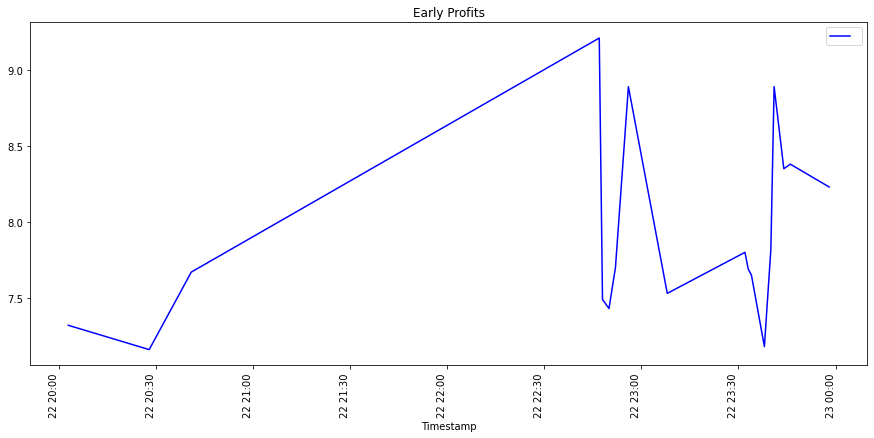

In [129]:
# Plot the results for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_early.plot(legend=True, figsize=(15,7), rot=90,  label="", color="blue", title="Early Profits")


In [130]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()


count    281.000000
mean      71.502847
std       37.190881
min       34.280000
25%       44.870000
50%       55.530000
75%       88.100000
max      198.160000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Middle Profits'}, xlabel='Timestamp'>

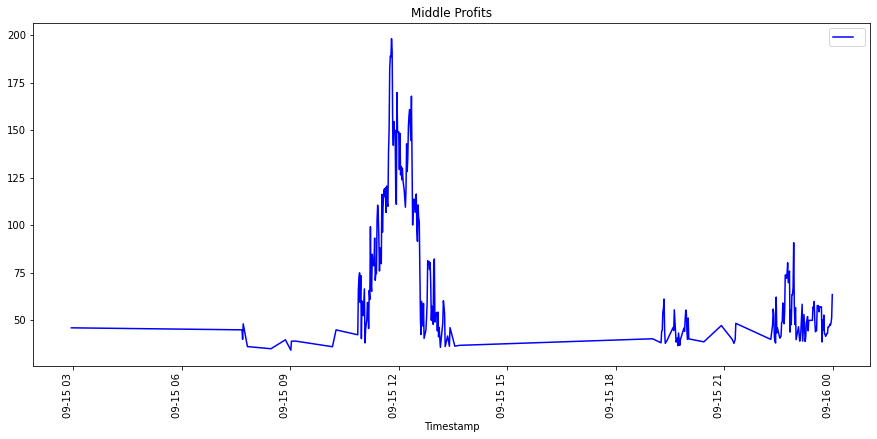

In [131]:
# Plot the results for the middle profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_middle.plot(legend=True, figsize=(15,7), rot=90,  label="", color="blue", title="Middle Profits")


In [132]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Late Profits'}, xlabel='Timestamp'>

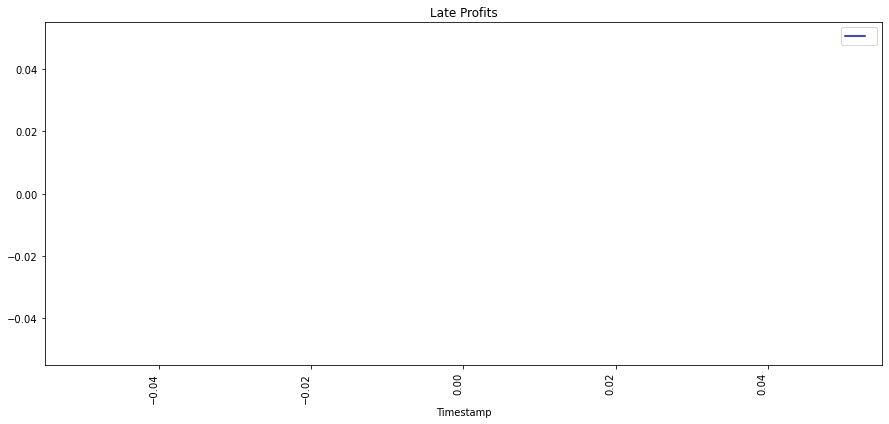

In [133]:
# Plot the results for the late profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_late.plot(legend=True, figsize=(15,7), rot=90,  label="", color="blue", title="Late Profits")


#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [134]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early

142.3899999999993

In [135]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle

20092.299999999996

In [136]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_sum_late = profit_per_trade_late.sum()
profit_sum_late


0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [137]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()



<AxesSubplot:title={'center':'CumulativeSum Early Profits'}, xlabel='Timestamp'>

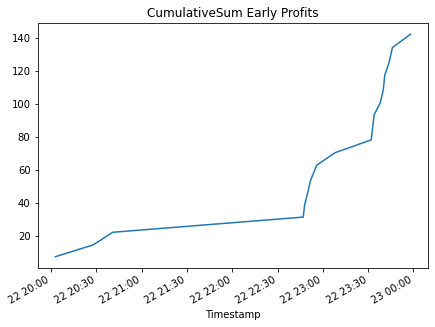

In [138]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot

cumulative_profit_early.plot(figsize=(7, 5), title="CumulativeSum Early Profits")

In [139]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()


<AxesSubplot:title={'center':'CumulativeSum Middle Profits'}, xlabel='Timestamp'>

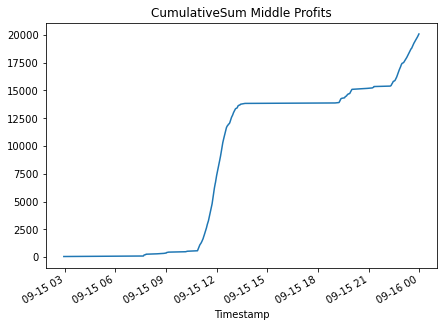

In [142]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_middle.plot(figsize=(7, 5), title="CumulativeSum Middle Profits")


In [143]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'CumulativeSum Late Profits'}, xlabel='Timestamp'>

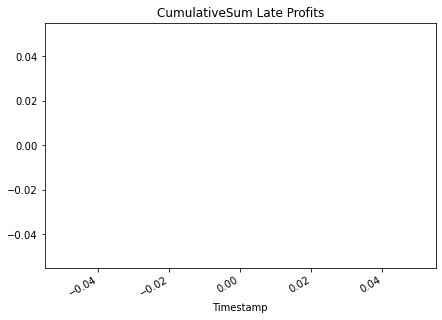

In [144]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_late.plot(figsize=(7, 5), title="CumulativeSum Late Profits")


**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Arbitrage profits are extremely hard to come by at the market for Bitcoin matures across time. As Bitcoin grows in populatiry, the prices across the two exhanges trade more in line with one another. That makes is very difficult find a point where the price difference exceeds the minimum profit threshold of 1%.